# Bond Interest Rate Risk

## Pricing

A bond is a fixed income instrument which can be decomposed into coupon payments and the face value of the bond. Coupons are regular payments often quoted as a percentage of the face value of the bond. The price of a flat structure bond is equal to

$$P =\sum_{i=1}^{n} \frac{C_i}{(1+r)^i} + \frac{Fv}{(1+r)^n}$$

Where $ C_i $ is the coupon value at time $t$, $n$ is the number of periods before maturity and $r$ is the yield to maturity. Yield to maturity is the expected return of the bond if held till maturity. Given a coupon rate $C_r$, if $ r \lt C_r $ then the bond is trading at a premium, if $ r \gt C_r $ the bond is issued at a discount and if $ r = C_r $ the bond is at par value. The equation above can be simplified to make computation easy.


$$P = \frac{C(1-(1+r)^{-n})}{r} + \frac{Fv}{(1+r)^n}$$


## Volatility

It's clear that the price of a bond is inversely proportional to its yield to maturity. An increase in interest rates will cause the price to fall and a decrease will have the inverse effect. Consider pricing a 25 year 6% coupon bond with a yield of 9% and a face value of a $100. We also show the relationship between the bond price and interest rates.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from models.bond import Bond

In [20]:
price = Bond.present_valuation(100,9,6,25)
print(f"Price : {price}")

Price : 70.3569883321884


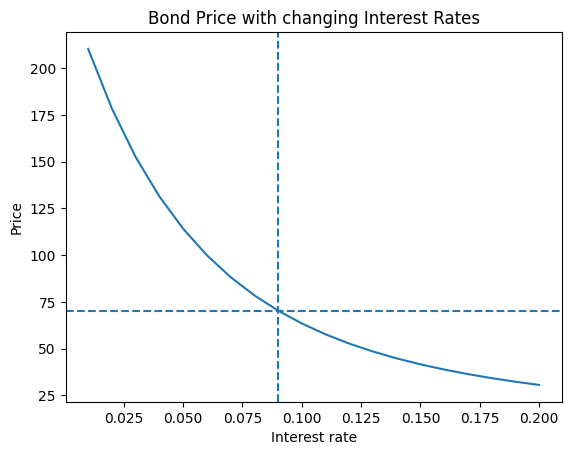

In [21]:
interest_rates = np.linspace(1, 21)
prices = [Bond.present_valuation(100,p,6,25) for p in range(1,21)]

plt.plot(np.arange(1,21)/100,prices)
plt.title("Bond Price with changing Interest Rates")
plt.xlabel("Interest rate")
plt.ylabel("Price")
plt.axhline(price, linestyle='--')
plt.axvline(0.09, linestyle='--')
plt.show()


We can approximate price volatility of a bond by measuring it's percentage price sensitivity $\frac{\Delta P}{P} $ to interest rate movement $\Delta r$. Using Taylor expansion the price volatility can be approximated as

$$ \frac{\Delta P}{P} \approx \frac{\partial P}{\partial r} \frac{1}{P} \Delta r + \frac{\partial^2 P}{\partial r^2} \frac{1}{2P} \Delta r^2 $$

Where the first order term is related to duration and the second order term to convexity. The equation below is for modified duration, there are other types of duration exist such as the Macaulay duration. A higher duration means the bond is more sensitive to interest rate changes. 

$$ \frac{\frac{\partial P}{P}}{\partial r}  = \frac{1}{P}[\frac{-C}{r^2}(1-\frac{1}{(1+r)^n})+\frac{n(\frac{C}{r}-Fv)}{(1+r)^{n+1}}] $$


In [22]:
duration = Bond.duration(100,price,9,6,25)
print(f"Duration : {duration}")

Duration : 10.617549409592993


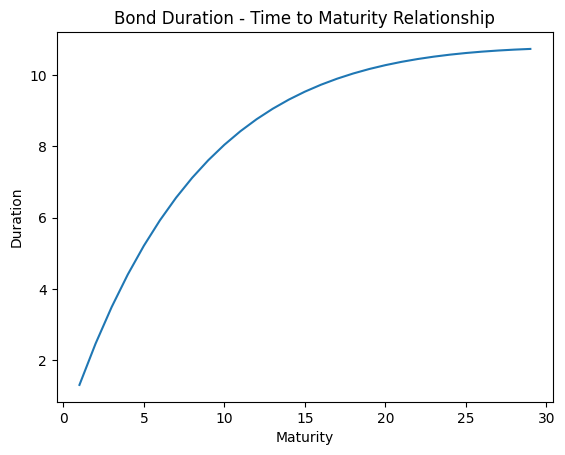

In [23]:
duration_to_maturity = [Bond.duration(100,price,9,6,p) for p in range(1,30)]
plt.plot(np.arange(1,30),duration_to_maturity)
plt.title("Bond Duration - Time to Maturity Relationship")
plt.xlabel("Maturity")
plt.ylabel("Duration")
plt.show()


The interest rate risk / duration is grater for long term bonds as shown in the figure above. It is also evident a higher coupon and yield decreases duration. Bond convexity is used to improve the approximation following the Taylor expansion. The convexity of a bond is defined as the second order derivative of the bond price percentage change.

$$ \frac{\frac{\partial^2 P}{P}}{\partial r^2}  = \frac{1}{P}[\frac{2C}{r^3}(1-\frac{1}{(1+r)^n})-\frac{2Cn}{r^2(1+r)^{r+1}}+\frac{n(n+1)(Fv-\frac{C}{r})}{(1+r)^{n+2}}] $$

Using the same example as above the convexity of the bond is calculated to be 182.9

In [24]:
convexity = Bond.convexity(100,price,9,6,25)
print(f"Convexity : {convexity}")

Convexity : 182.91097471895284


Assume the yield changes by 2%, using duration the approximate price change of the bond will be 21%.

In [25]:
# approximation using duration
interest_rate_change =  0.02
first_approximation = -duration*interest_rate_change
first_approximation

-0.21235098819185985

This can be improved by calculating the convexity. The improved estimate becomes 17%.

In [26]:
# improved approximation
improved_approximation = first_approximation + 0.5*convexity*interest_rate_change**2
improved_approximation

-0.17576879324806927

The bond price will change by 17% for a 2% change in interest rates.